In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


# Data Load

In [2]:
header = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
                  'capital-loss', 'hours-per-week', 'native-country', 'salary']
try:
  df_temp = pd.read_csv("adults.csv",index_col=False, skipinitialspace=True,header=None,names=header)
except:
  df_temp = pd.read_csv("https://raw.githubusercontent.com/aliakbarbadri/mlp-classifier-adult-dataset/master/adults.csv", index_col=False, skipinitialspace=True,header=None,names=header)

df = df_temp

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

# Data Preprocessing

In [6]:
#Drop rows with NaN value
#change ? to np.nan
df = df.replace('?', np.nan)
df[pd.isnull(df).any(axis=1)].shape

(3620, 15)

In [7]:
#Drop rows containing nan
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(48842, 15)
(45222, 15)


In [8]:
#Deal with categorical columns
#categorical columns

#workclass
#education
#education-num
#marital-status
#occupation
#relationship
#race
#sex
#native-country
#salary

#drop the education-num column because there is education column

df.drop('education-num', axis=1, inplace=True)

#convert categoricals to numerical

categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
label_column = ['salary']

def show_unique_values(columns):
  for column in columns:
    uniq = df[column].unique().tolist()
    print(column+ " has "+ str(len(uniq)) +" values" + " : " + str(uniq))
show_unique_values(categorical_columns)
show_unique_values(label_column)

workclass has 7 values : ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay']
education has 16 values : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
marital-status has 7 values : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation has 14 values : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship has 6 values : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race has 5 values : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex has 2 values : ['Male', 'Femal

In [9]:
#convert to int
def convert_to_int(columns):
  for column in columns:
    unique_values = df[column].unique().tolist()
    dic = {}
    for indx, val in enumerate(unique_values):
      dic[val]=indx
    df[column] = df[column].map(dic).astype(int)
    print(column + " done!")
convert_to_int(label_column)
show_unique_values(label_column)

#convert to one-hot (good one)
def convert_to_onehot(data,columns):
  dummies = pd.get_dummies(data[columns])
  data = data.drop(columns, axis=1)
  data = pd.concat([data, dummies], axis=1)
  return data

df = convert_to_onehot(df,categorical_columns)

salary done!
salary has 2 values : [0, 1]


In [10]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.shape

(45222, 104)

In [12]:
#Normalize
#Numerical columns:

#age
#fnlwgt
#capital-gain
#capital-loss
#hours-per-week
normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']

def show_values(columns):
  for column in columns:
    max_val = df[column].max()
    min_val = df[column].min()
    mean_val = df[column].mean()
    var_val = df[column].var()
    print(column +': values=['+str(min_val)+','+str(max_val)+'] , mean='+str(mean_val)+' , var='+str(var_val))

show_values(normalize_columns)

age: values=[17,90] , mean=38.547941267524656 , var=174.71209312779473
fnlwgt: values=[13492,1490400] , mean=189734.7343107337 , var=11159639548.606062
capital-gain: values=[0,99999] , mean=1101.4303436380524 , var=56346492.60215572
capital-loss: values=[0,4356] , mean=88.595418159303 , var=163989.43649566895
hours-per-week: values=[1,99] , mean=40.93801689443191 , var=144.18025389432105


In [13]:
df_1 = df

In [14]:
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df[columns] = scaler.fit_transform(df[columns])
normalize(normalize_columns)
show_values(normalize_columns)

age: values=[-1.6302308284607552,3.8926564395212115] , mean=-2.3254240169053742e-17 , var=1.0000221136197784
fnlwgt: values=[-1.668364500112278,12.312472138449555] , mean=5.192923226940717e-17 , var=1.000022113619778
capital-gain: values=[-0.14673320201326512,13.175192739902075] , mean=-1.971896717038003e-17 , var=1.0000221136197782
capital-loss: values=[-0.21878025661034578,10.538060419744602] , mean=2.498259585729422e-17 , var=1.0000221136197784
hours-per-week: values=[-3.326123764725461,4.835526569709145] , mean=2.144732285862051e-16 , var=1.0000221136197784


In [15]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.034201,-1.062295,0.142888,-0.21878,-0.078120,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.866417,-1.007438,-0.146733,-0.21878,-2.326738,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.041455,0.245284,-0.146733,-0.21878,-0.078120,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,1.093385,0.425853,-0.146733,-0.21878,-0.078120,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.798015,1.407393,-0.146733,-0.21878,-0.078120,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Data Split and Preparation

In [16]:
#Split the data to train and test
from sklearn.model_selection import train_test_split

x_data = df.drop('salary',axis=1)
y_labels = df['salary']

X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.2,shuffle=True)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,shuffle=True)

print(X_train.shape, y_train.shape)
# print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(36177, 103) (36177,)
(9045, 103) (9045,)


In [17]:
def data_loader(dataset, batch_size, shuffle=False):
    return DataLoader(dataset, batch_size, shuffle=shuffle)

In [18]:
class Dataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.LongTensor(data)
        self.targets = torch.LongTensor(targets)
           
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, index):  # get the label and data by index
        x = self.data[index]
        y = self.targets[index]
        return x, y

In [19]:
train_dataset = Dataset(X_train[:36000].to_numpy(dtype=np.float16), y_train[:36000].to_numpy(dtype=np.float16))
test_dataset = Dataset(X_test[:9000].to_numpy(dtype=np.float16), y_test[:9000].to_numpy(dtype=np.float16))

In [20]:
train_loader = data_loader(train_dataset, 50, shuffle=True)
test_loader = data_loader(test_dataset, 50, shuffle=False)

# Model

In [21]:
class Relu_MLP_3base(nn.Module):
    def __init__(self, input_dim):
        super(Relu_MLP_3base, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [22]:
class Tanh_MLP_3base(nn.Module):
    def __init__(self, input_dim):
        super(Tanh_MLP_3base, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 2)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [23]:
class Tanh_MLP_3Layerwise(nn.Module):
    def __init__(self, input_dim):
        super(Tanh_MLP_3Layerwise, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 2)
        
    def forward(self, x, training_layer="fc3"):
        if training_layer == "fc1":
          x = torch.tanh(self.fc1(x))
        elif training_layer == "fc2":
          x = torch.tanh(self.fc1(x))
          x = torch.tanh(self.fc2(x))
        elif training_layer == "fc3":
          x = torch.tanh(self.fc1(x))
          x = torch.tanh(self.fc2(x))
          x = F.softmax(self.fc3(x), dim=1)
        return x

# Evaluation

In [24]:
def plot_loss(layer1, epoche, loss_type):
    """
    plot the loss change during the training precedure
    """
    plt.title("Train "+ loss_type)
    plt.xlabel("epoch")
    plt.ylabel(loss_type)
    epoche_range=[i+1 for i in range(epoche)]
    plt.plot(epoche_range, layer1)
    #plt.plot(epoche_range, layer2)
    #plt.plot(epoche_range, fc)
    plt.legend(['train loss', 'validation loss'], loc='best')
    plt.show()

def plot_acc(train, test, epoche):
    """
    plot the loss change during the training precedure
    """
    plt.title("Train and validation Accuarcy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    epoche_range=[i+1 for i in range(epoche)]
    plt.plot(epoche_range, train)
    plt.plot(epoche_range, test)
    #plt.plot(epoche_range, fc)
    plt.legend(['train accuracy', 'test accuracy'], loc='best')
    plt.show()

In [25]:
def eval(model, train_loader, isprint=True):
    model.eval()
    with torch.no_grad():
        train_correct = 0
        train_total = 0
  
        for images, labels in train_loader:
            images = images.float().to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
    
        train_acc = train_correct/train_total
    
    with torch.no_grad():
        test_correct = 0
        test_total = 0
        for images, labels in test_loader:
            images = images.float().to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    
        test_acc = test_correct/test_total

    if isprint:
        print('Accuracy of the network on the train: {} %'.format(100 * train_acc))
        print('Accuracy of the network on the test: {} %'.format(100 * test_acc))
    
    return train_acc, test_acc 

# Mine

In [26]:
import math
EPS = 1e-6

class ConcatLayer(nn.Module):
    def __init__(self, dim=1):
        super().__init__()
        self.dim = dim

    def forward(self, x, y):
        return torch.cat((x, y), self.dim)


class CustomSequential(nn.Sequential):
    def forward(self, *input):
        for module in self._modules.values():
            if isinstance(input, tuple):
                input = module(*input)
            else:
                input = module(input)
        return input

class EMALoss(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, running_ema):
        ctx.save_for_backward(input, running_ema)
        input_log_sum_exp = input.exp().mean().log()

        return input_log_sum_exp

    @staticmethod
    def backward(ctx, grad_output):
        input, running_mean = ctx.saved_tensors
        grad = grad_output * input.exp().detach() / \
            (running_mean + EPS) / input.shape[0]
        return grad, None


def ema(mu, alpha, past_ema):
    return alpha * mu + (1.0 - alpha) * past_ema


def ema_loss(x, running_mean, alpha):
    t_exp = torch.exp(torch.logsumexp(x, 0) - math.log(x.shape[0])).detach()
    if running_mean == 0:
        running_mean = t_exp
    else:
        running_mean = ema(t_exp, alpha, running_mean.item())
    t_log = EMALoss.apply(x, running_mean)

    # Recalculate ema

    return t_log, running_mean

class Mine(nn.Module):
    def __init__(self, T, loss='mine', alpha=0.01, method=None):
        super().__init__()
        self.running_mean = 0
        self.loss = loss
        self.alpha = alpha
        self.method = method

        if method == 'concat':
            if isinstance(T, nn.Sequential):
                self.T = CustomSequential(ConcatLayer(), *T)
            else:
                self.T = CustomSequential(ConcatLayer(), T)
        else:
            self.T = T

    def forward(self, x, z, z_marg=None):
        if z_marg is None:
            z_marg = z[torch.randperm(x.shape[0])]
        
        t = self.T(x, z).mean()
        t_marg = self.T(x, z_marg)

        if self.loss in ['mine']:
            second_term, self.running_mean = ema_loss(
                t_marg, self.running_mean, self.alpha)
        elif self.loss in ['fdiv']:
            second_term = torch.exp(t_marg - 1).mean()
        elif self.loss in ['mine_biased']:
            second_term = torch.logsumexp(
                t_marg, 0) - math.log(t_marg.shape[0])

        return -t + second_term

class T(nn.Module):
    def __init__(self, x_dim, z_dim):
        super().__init__()
        self.layers = CustomSequential(ConcatLayer(), nn.Linear(x_dim + z_dim, 400),
                                       nn.ReLU(),
                                       nn.Linear(400, 400),
                                       nn.ReLU(),
                                       nn.Linear(400, 400),
                                       nn.ReLU(),
                                       nn.Linear(400, 1))

    def forward(self, x, z):
        return self.layers(x, z)

# Training

In [27]:
def training_block(num_epochs, model, training_layer, mine, loss_type, optimizer, train_loader,iseval = False):
    result_list = []
    total_step = len(train_loader)
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        sum_MI = 0
        model.train()
        if loss_type != "cross entropy":
            mine.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.float().to(device)
            labels = labels.to(device)      
            # Forward pass
            outputs = model(images, training_layer=training_layer)
            #l = mine(images, outputs, labels, loss_type)
            if loss_type == 'MI(X;Z)':
                l = mine(images, outputs)
            elif loss_type == 'MI(Y;Z)':
                labels = labels.view(labels.shape[0], -1).to(device) 
                l = mine(labels, outputs)
            elif loss_type == "cross entropy":
                l = mine(outputs, labels)
            # Backward and optimize
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            MI = l.item()
            sum_MI += MI
   
        avg_MI = sum_MI/total_step
        result_list.append(avg_MI)
        output = 'Epoch [{}/{}], '+ training_layer+' ' + loss_type +' : {:.4f}' 
        print (output.format(epoch+1, num_epochs, avg_MI))
        if iseval:
            if epoch == num_epochs-1:
                isprint = True
            else:
                isprint = False
            train_acc, test_acc = eval(model, train_loader, isprint=isprint)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

    if len(train_acc_list) == num_epochs: 
        plot_acc(train_acc_list, test_acc_list, num_epochs)
  
    if iseval:
        return result_list, train_acc_list[-1], test_acc_list[-1]
    else:
        return result_list

In [28]:
def three_layers_training(model, num_epochs, loss_list, layer_list, train_dataset):
    if len(train_dataset[0]) < 500:
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=50, shuffle=True)
    else:
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=500, shuffle=True)
  
    for param in model.parameters(): 
        param.requires_grad = False
  
    #training fc1
    print("Training fc1")
    for name, param in model.fc1.named_parameters():
        param.requires_grad = True
    mine = Mine(T(X_train.shape[1], 64), loss = 'mine').to(device)
    optimizer = torch.optim.Adam(
                                [{"params": model.parameters(), "lr": 1e-6},
                                {"params": mine.parameters(), "lr": 1e-6}])
    loss_type = loss_list[0]
    training_layer = layer_list[0]
    fc1 = training_block(num_epochs, model, training_layer, mine, loss_type, optimizer, train_loader)
    for name, param in model.fc1.named_parameters():
        param.requires_grad = False

    #training fc2
    print("Training fc2")
    for name, param in model.fc2.named_parameters():
        param.requires_grad = True
    mine = Mine(T(1, 16), loss = 'mine').to(device)
    optimizer = torch.optim.Adam(
                                [{"params": model.parameters(), "lr": 1e-6},
                                {"params": mine.parameters(), "lr": 1e-6}])
    loss_type = loss_list[1]
    training_layer = layer_list[1]
    fc2 = training_block(num_epochs, model, training_layer, mine, loss_type, optimizer, train_loader)
    for name, param in model.fc2.named_parameters():
        param.requires_grad = False

    #training fc3
    print("Training fc3")
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=50, shuffle=True)
    for name, param in model.fc3.named_parameters():
        param.requires_grad = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    mine = nn.CrossEntropyLoss()
    loss_type = loss_list[2]
    training_layer = layer_list[2]
    fc3, train_acc, test_acc = training_block(num_epochs, model, training_layer, mine, loss_type, optimizer, train_loader, iseval=True)
    for name, param in model.fc3.named_parameters():
        param.requires_grad = False

    return fc1, fc2, fc3, train_acc, test_acc

In [ ]:
model = Tanh_MLP_3Layerwise(X_train.shape[1]).to(device)
# Loss and optimizer
#criterion2 = loss_fn
#optimizer2 = [torch.optim.Adam(model2.parameters(), lr=0.00001, maximize=True), 
#              torch.optim.Adam(model2.parameters(), lr=0.00005, maximize=True), 
#              torch.optim.Adam(model2.parameters(), lr=0.001)]
loss_list = ['MI(X;Z)', "MI(Y;Z)", "cross entropy"]
layer_list = ['fc1', 'fc2', 'fc3']
num_epochs = 1500
fc1, fc2, fc3, _, _ = three_layers_training(model, num_epochs, loss_list, layer_list, train_dataset)

Accuracy of the network on the train: 83.77222222222223 %
Accuracy of the network on the test: 83.55555555555556 %

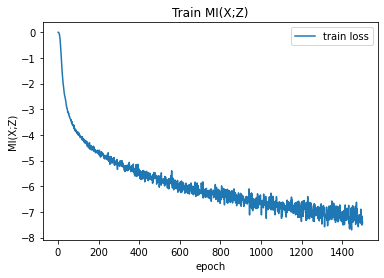

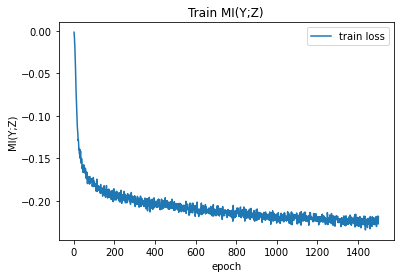

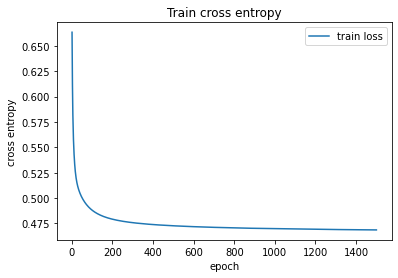

In [30]:
plot_loss(fc1, num_epochs, loss_list[0])
plot_loss(fc2, num_epochs, loss_list[1])
plot_loss(fc3, num_epochs, loss_list[2])

In [ ]:
# Accuracy train: 83.475% Accuracy test: 83.24444444444444 %
# Accuracy train: 83.09166666666667 % Accuracy test: 82.92222222222222 %
# Accuracy train: 83.575 %            Accuracy test: 83.6888888888889 %

In [31]:
model_save_name = 'MineMLP.pt'
path = F"./model/{model_save_name}" 
torch.save(model.state_dict(), path)

In [32]:
model_save_name = 'MineMLP.pt'
path = F"./model/{model_save_name}" 
torch.save(model, path)

# T-SNE visualization

In [26]:
# load saved model
model_save_name = 'MineMLP.pt'
path = F"./model/{model_save_name}" 
model = torch.load(path)

In [30]:
model

Tanh_MLP_3Layerwise(
  (fc1): Linear(in_features=103, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=2, bias=True)
)

In [27]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
import numpy as np

Visualize dataset

In [28]:
x = X_test.to_numpy(dtype=np.float16)

In [29]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9045 samples in 0.004s...
[t-SNE] Computed neighbors for 9045 samples in 2.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9045
[t-SNE] Computed conditional probabilities for sample 2000 / 9045
[t-SNE] Computed conditional probabilities for sample 3000 / 9045
[t-SNE] Computed conditional probabilities for sample 4000 / 9045
[t-SNE] Computed conditional probabilities for sample 5000 / 9045
[t-SNE] Computed conditional probabilities for sample 6000 / 9045
[t-SNE] Computed conditional probabilities for sample 7000 / 9045
[t-SNE] Computed conditional probabilities for sample 8000 / 9045
[t-SNE] Computed conditional probabilities for sample 9000 / 9045
[t-SNE] Computed conditional probabilities for sample 9045 / 9045
[t-SNE] Mean sigma: 0.808983
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.862656
[t-SNE] KL divergence after 1000 iterations: 1.787461


In [30]:
df = pd.DataFrame()
df["y"] = np.squeeze(y_test)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

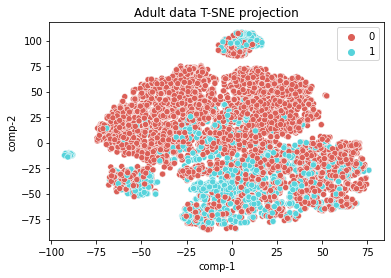

In [31]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Adult data T-SNE projection")
plt.savefig('MLP_Adult_data_tsne.pdf')

Compute the outputs of each MLP layer

In [32]:
dataset = Dataset(X_test.to_numpy(dtype=np.float16), y_test.to_numpy(dtype=np.float16))

In [33]:
loader = data_loader(dataset, 1, shuffle=False)

In [34]:
def layer_output(model, train_loader, training_layer):
    model.eval()
    output_list = []
    with torch.no_grad():
            
        for images, labels in train_loader:
            images = images.float().to(device)
            
            outputs = model(images, training_layer)
            
            output_list.append([outputs[0], labels])
    
    return output_list

In [35]:
fc1_outputs = layer_output(model.to(device), loader, 'fc1')
fc2_outputs = layer_output(model.to(device), loader, 'fc2')
fc3_outputs = layer_output(model.to(device), loader, 'fc3')

Visualize fc1

In [36]:
fc1_x = []
fc1_y = []
for item in fc1_outputs:
    x = item[0].cpu().numpy()
    y = item[1].cpu().numpy()
    fc1_x.append(x)
    fc1_y.append(y)

In [37]:
fc1_x = np.array(fc1_x)
fc1_y = np.array(fc1_y)

In [38]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(fc1_x) 

/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9045 samples in 0.002s...
[t-SNE] Computed neighbors for 9045 samples in 2.009s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9045
[t-SNE] Computed conditional probabilities for sample 2000 / 9045
[t-SNE] Computed conditional probabilities for sample 3000 / 9045
[t-SNE] Computed conditional probabilities for sample 4000 / 9045
[t-SNE] Computed conditional probabilities for sample 5000 / 9045
[t-SNE] Computed conditional probabilities for sample 6000 / 9045
[t-SNE] Computed conditional probabilities for sample 7000 / 9045
[t-SNE] Computed conditional probabilities for sample 8000 / 9045
[t-SNE] Computed conditional probabilities for sample 9000 / 9045
[t-SNE] Computed conditional probabilities for sample 9045 / 9045
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.920280
[t-SNE] KL divergence after 1000 iterations: 1.441138


In [39]:
df = pd.DataFrame()
df["y"] = np.squeeze(fc1_y)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

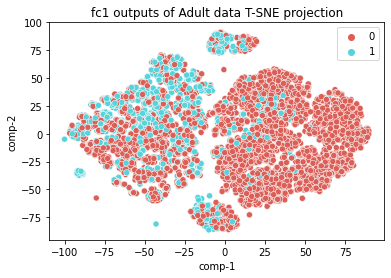

In [40]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="fc1 outputs of Adult data T-SNE projection")
plt.savefig('MLP_fc1_tsne.pdf')

Visualize fc2

In [41]:
fc2_x = []
fc2_y = []
for item in fc2_outputs:
    x = item[0].cpu().numpy()
    y = item[1].cpu().numpy()
    fc2_x.append(x)
    fc2_y.append(y)
    
fc2_x = np.array(fc2_x)
fc2_y = np.array(fc2_y)

In [42]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(fc2_x) 

/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9045 samples in 0.001s...
[t-SNE] Computed neighbors for 9045 samples in 2.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9045
[t-SNE] Computed conditional probabilities for sample 2000 / 9045
[t-SNE] Computed conditional probabilities for sample 3000 / 9045
[t-SNE] Computed conditional probabilities for sample 4000 / 9045
[t-SNE] Computed conditional probabilities for sample 5000 / 9045
[t-SNE] Computed conditional probabilities for sample 6000 / 9045
[t-SNE] Computed conditional probabilities for sample 7000 / 9045
[t-SNE] Computed conditional probabilities for sample 8000 / 9045
[t-SNE] Computed conditional probabilities for sample 9000 / 9045
[t-SNE] Computed conditional probabilities for sample 9045 / 9045
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.028336
[t-SNE] KL divergence after 1000 iterations: 1.322827


In [43]:
df = pd.DataFrame()
df["y"] = np.squeeze(fc2_y)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

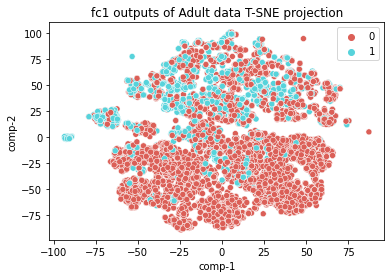

In [44]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="fc1 outputs of Adult data T-SNE projection")
plt.savefig('MLP_fc2_tsne.pdf')

Visualize fc3

In [45]:
fc3_x = []
fc3_y = []
for item in fc3_outputs:
    x = item[0].cpu().numpy()
    y = item[1].cpu().numpy()
    fc3_x.append(x)
    fc3_y.append(y)
    
fc3_x = np.array(fc3_x)
fc3_y = np.array(fc3_y)

In [46]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(fc3_x) 

/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9045 samples in 0.010s...
[t-SNE] Computed neighbors for 9045 samples in 0.123s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9045
[t-SNE] Computed conditional probabilities for sample 2000 / 9045
[t-SNE] Computed conditional probabilities for sample 3000 / 9045
[t-SNE] Computed conditional probabilities for sample 4000 / 9045
[t-SNE] Computed conditional probabilities for sample 5000 / 9045
[t-SNE] Computed conditional probabilities for sample 6000 / 9045
[t-SNE] Computed conditional probabilities for sample 7000 / 9045
[t-SNE] Computed conditional probabilities for sample 8000 / 9045
[t-SNE] Computed conditional probabilities for sample 9000 / 9045
[t-SNE] Computed conditional probabilities for sample 9045 / 9045
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.641716
[t-SNE] KL divergence after 1000 iterations: 0.271022


In [47]:
df = pd.DataFrame()
df["y"] = np.squeeze(fc3_y)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

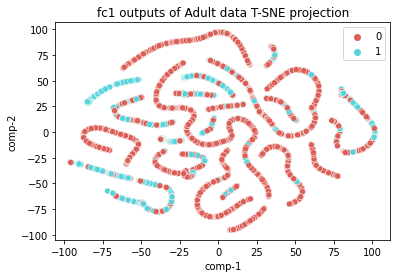

In [48]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="fc1 outputs of Adult data T-SNE projection")
plt.savefig('MLP_fc3_tsne.pdf')